# Generation of the simulation 
### save one example of time series and all measures

In [1]:
import time as tm
import colorsys
import pickle # package use to save data

exec(open("solver.py").read(), globals())
exec(open("param.py").read(), globals())

In [2]:
def exemples(name, Number_of_simulation = 100, mean = True, **kwargs):
    name = name+"_freq="+str(kwargs["Fire_param"]["param_freq"]["p"])+".png"
    O = Ode(**kwargs)
    Y = O.solve_by_part()
    O.plot_time_series(save = True, name = name, generation = True, show = False)
    return Y

In [3]:
def param_study(Number_of_simulation, numbreDePoint, Freq, Param_phy, Init, finalTime, alpha, beta, strength, dt, name):
   # Color = ["blue", "g", "red", "orange", "pink", "black", "magenta", "grey"]
    Param_coupled = {"alpha":alpha,
                     "beta":beta}
    Param_freq = {"p":-1} # going to change
    Param_strength = {"scale":strength}
    Fire_param = {"model": "coupled",
                    "frequence": "bernoulli",
                    "param_freq" : Param_freq,
                    "amplitude": "exponential",
                    "Param_strength" : Param_strength,
                    "Param_coupled" : Param_coupled,
                    "type" : "proportionnal",
                    "coef_W_N" : 5}

    # Initialization of arrays
    Collapse = np.zeros((numbreDePoint, len(Freq)))
    Variability_always = np.zeros_like(Collapse)
    Variability_tr10 = np.zeros_like(Collapse)
    Variability_tr0 = np.zeros_like(Collapse)
    
#    Variability_always = np.zeros_like(Collapse)
 #   Variability_until = np.zeros_like(Collapse)
  #  Variability_only = np.zeros_like(Collapse)
   # Variability_10 = np.zeros_like(Collapse)
    #Collapse_10_b = np.zeros_like(Collapse)
    #Collapse_10_m = np.zeros_like(Collapse)
    #Variability_half = np.zeros_like(Collapse)
    #Speed_collapse = np.zeros_like(Collapse)
    #Viability = np.zeros_like(Collapse)
    #Ratio = np.zeros_like(Collapse)
    #Point = np.zeros_like(Collapse)
    #Time_rotation_N = np.zeros_like(Collapse)
    #Time_rotation_W = np.zeros_like(Collapse)
    
    #Exemples = np.zeros(len(Freq))
    
    for i, freq in enumerate(Freq):
        Param_freq = {"p":freq}
        Fire_param["param_freq"] = Param_freq
        # dt = min(0.1, 0.1/freq)
        exemples(name = name, Number_of_simulation = Number_of_simulation, mean = False, finalTime = finalTime, Fire_param = Fire_param, dt = dt, Param_phy=Param_phy, Init=Init)
        for j in range(numbreDePoint):
            S = Solver(numberOfSimulation=Number_of_simulation, model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
            S.run()
            Collapse[j,i] = S.collapse()
            Variability_always[j,i]
            Variability_always[j,i] = S.variability_always()
            Variability_tr10[j,i] = S.variability_tr10()
            Variability_tr0[j,i] = S.variability_tr0()
            
           # print("\nTime solve init", t05-t0)
            #print("Time solver ", t1-t05)
            #print("Time collapse ", t2-t1)
            #print("Time variability ", t3-t2)
            
    Measures = {"Collapse": Collapse,
                "Variability_always": Variability_always, 
                "Variability_tr10": Variability_tr10,
                "Variability_tr0": Variability_tr0}
    
    # save data
    pickle_out = open(name+".txt","wb")
    pickle.dump(Measures, pickle_out)
    pickle_out.close()
    
    return

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: Mean of empty slice
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:114: RuntimeWarning: Mean of empty slice


Tue Apr 16 18:03:36 2019 , Figure  18 (total  1728 )
Tue Apr 16 18:29:52 2019 , Figure  36 (total  1728 )
Tue Apr 16 18:56:10 2019 , Figure  54 (total  1728 )


C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: Mean of empty slice


Tue Apr 16 19:22:27 2019 , Figure  72 (total  1728 )
Tue Apr 16 19:48:44 2019 , Figure  90 (total  1728 )
Tue Apr 16 20:15:02 2019 , Figure  108 (total  1728 )
Tue Apr 16 20:41:18 2019 , Figure  126 (total  1728 )
Tue Apr 16 21:07:36 2019 , Figure  144 (total  1728 )
Tue Apr 16 21:33:57 2019 , Figure  162 (total  1728 )
Tue Apr 16 22:00:12 2019 , Figure  180 (total  1728 )
Tue Apr 16 22:26:29 2019 , Figure  198 (total  1728 )
Tue Apr 16 22:52:51 2019 , Figure  216 (total  1728 )
Tue Apr 16 23:19:06 2019 , Figure  234 (total  1728 )
Tue Apr 16 23:45:24 2019 , Figure  252 (total  1728 )
Wed Apr 17 00:11:44 2019 , Figure  270 (total  1728 )
Wed Apr 17 00:37:58 2019 , Figure  288 (total  1728 )
Wed Apr 17 01:04:18 2019 , Figure  306 (total  1728 )
Wed Apr 17 01:30:38 2019 , Figure  324 (total  1728 )
Wed Apr 17 01:56:53 2019 , Figure  342 (total  1728 )
Wed Apr 17 02:23:11 2019 , Figure  360 (total  1728 )
Wed Apr 17 02:49:32 2019 , Figure  378 (total  1728 )
Wed Apr 17 03:15:46 2019 , Fig

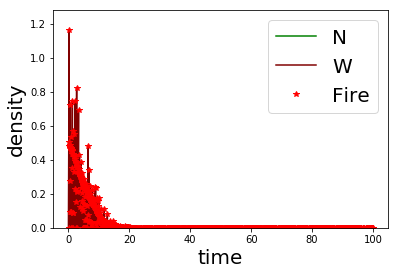

In [4]:
nomberFigure = len(N0)*len(W0)*len(FinalTime)*len(A)*len(M)*len(Alpha)*len(Beta)*len(Strength)
fig_by_loop = len(Freq) + 1

c=0
for n0 in N0:
    for w0 in W0:
        Init = [n0, w0]
        for finalTime in FinalTime:
            for a in A:
                for m in M:
                    Param_phy = [a, m]
                    #Init = [1., Param_phy[1]]
                    for strength in Strength:
                        for alpha in Alpha:
                            for beta in Beta:
                                name = DOSSIER+"n0="+str(n0)+"_w0="+str(w0)+"_final_time="+str(finalTime)+"_a="+str(a)+"_m="+str(m)+"_strength="+str(strength)+"_alpha="+str(alpha)+"_beta="+str(beta)
                                param_study(Number_of_simulation, numbreDePoint, Freq, Param_phy, Init, finalTime, alpha, beta, strength, dt, name)           
                                c+=1
                                print(tm.ctime(), ", Figure ", c*fig_by_loop, "(total ", fig_by_loop*nomberFigure, ")") # afficher l'heure